In [6]:
from pathlib import Path
import torchaudio
from utils.audio import print_stats, plot_waveform, plot_specgram, play_audio, plot_spectrogram

AUDIO_EXTENSION = 'mp3'
audio_paths = list(Path('../data/TedSrt').rglob("*." + AUDIO_EXTENSION))

../data/TedSrt/train/47/47-372.mp3

In [7]:
max_frame = 0
max_path = None
max_waveform = None
for audio_path in audio_paths:
    waveform, sample_rate = torchaudio.load(audio_path)
    if waveform.shape[1] > max_frame:
        max_frame = max(max_frame, waveform.shape[1])
        max_path = audio_path
        max_waveform = waveform
print(max_frame)
print(max_path)

413526
../data/TedSrt/dev/31/31-28.mp3


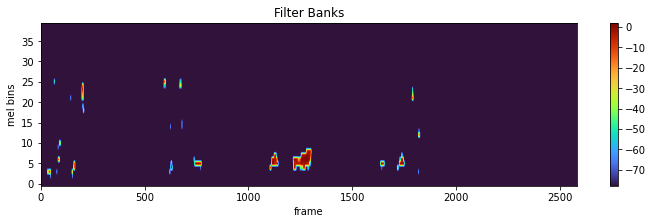

In [8]:
feat_dim = 40
waveform_trans = torchaudio.compliance.kaldi.fbank(max_waveform, frame_length=25, frame_shift=10, num_mel_bins=feat_dim)
plot_spectrogram(waveform_trans.transpose(0, 1).detach(), title="Filter Banks", ylabel='mel bins')

In [9]:
waveform_trans.shape

torch.Size([2583, 40])